In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.stats as stats

In [3]:
import os


dataset_path = '/kaggle/input/zomato-india-data-set'

def get_city_data(cityname):
    dataframes = []
    normalized_city_name = cityname.lower()

    for city_folder in os.listdir(dataset_path):
        city_path = os.path.join(dataset_path, city_folder)
        
        if os.path.isdir(city_path) and normalized_city_name in city_folder.lower():
            for file in os.listdir(city_path):
                if file.endswith('.csv'):
                    file_path = os.path.join(city_path, file)
                    try:
                        data = pd.read_csv(file_path,  delimiter='|', error_bad_lines=False, warn_bad_lines=True)  # Skip bad lines
                        data['city'] = cityname
                        data['cuisine'] = file[:-4]
                        dataframes.append(data)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
            if dataframes:
                city_data = pd.concat(dataframes, ignore_index=True)
                return city_data
            else:
                print("No data found for the city.")
                return None
    print("City not found")
    return None

city_name = input("Enter the city name: ")  
city_data = get_city_data(city_name)

if city_data is not None:
    print(city_data.head())

Enter the city name:  Agra


Error reading /kaggle/input/zomato-india-data-set/Agra/9-Agrahotels.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading /kaggle/input/zomato-india-data-set/Agra/26-Agrahotels.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading /kaggle/input/zomato-india-data-set/Agra/20-Agrahotels.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading /kaggle/input/zomato-india-data-set/Agra/34-Agrahotels.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading /kaggle/input/zomato-india-data-set/Agra/21-Agrahotels.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading /kaggle/input/zomato-india-data-set/Agra/60-Agrahotels.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading /kaggle/input/zomato-india-data-set/Agra/55-Agrahotels.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading /kaggle/input/zomato-

In [4]:

city_folder = '/kaggle/input/zomato-india-data-set/Agra'
file = os.listdir(city_folder)[0]  
file_path = os.path.join(city_folder, file)


with open(file_path, 'r') as f:
    for i in range(10):  
        print(f.readline())

"NAME"|"PRICE"|"CUSINE_CATEGORY"|"CITY"|"REGION"|"URL"|"PAGE NO"|"CUSINE TYPE"|"TIMING"|"RATING_TYPE"|"RATING"|"VOTES"

"Love Restaurant"|"300"|"North Indian,Fast Food,Beverages"|"Agra"|"Tajganj"|"https://www.zomato.com/agra/love-restaurant-tajganj/info"|"9"|"Quick Bites"|"8am to 11pm(Mon,Tue,Sat),8am to 1130pm..."|"Good"|"3.7"|"36"

"WatchMeWhip"|"250"|"Bakery,Desserts"|"Agra"|"Mantola"|"https://www.zomato.com/agra/watchmewhip-mantola/info"|"9"|"Bakery"|"9am to 9pm(Mon-Sat),Closed(Sun)"|"Good"|"3.6"|"44"

"UP 80"|"700"|"North Indian,Chinese"|"Agra"|"Dayal Bagh"|"https://www.zomato.com/agra/up-80-dayal-bagh/info"|"9"|"Casual Dining"|"11am to 1030pm(Mon-Sun)"|"Good"|"3.7"|"111"

"Potato Planet"|"400"|"Fast Food"|"Agra"|"Civil Lines"|"https://www.zomato.com/agra/potato-planet-1-civil-lines/info"|"9"|"Quick Bites"|"12noon to 930pm(Mon-Sat),12noon to 10pm(Sun)"|"Good"|"3.8"|"113"

"Anand He Anand Bhojanalaya"|"300"|"North Indian"|"Agra"|"Civil Lines"|"https://www.zomato.com/agra/anand-he-a

In [5]:
import os
import pandas as pd


city_folder = '/kaggle/input/zomato-india-data-set/Agra'
file = os.listdir(city_folder)[0]  
file_path = os.path.join(city_folder, file)


df = pd.read_csv(file_path, delimiter='|"', engine='python')


print(df.head())


ParserError: Expected 240 fields in line 7, saw 295. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [6]:
city_folder = '/kaggle/input/zomato-india-data-set/Agra'
file = os.listdir(city_folder)[0]  
file_path = os.path.join(city_folder, file)


with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()


cleaned_data = []
for line in lines:
    
    split_line = line.strip().split('|')
    split_line = [item.replace('"', '').strip() for item in split_line] 
    cleaned_data.append(split_line)


columns = cleaned_data[0]  
data = cleaned_data[1:]    

# Creating a DataFrame
df = pd.DataFrame(data, columns=columns)



print(df.head())

                         NAME PRICE                   CUSINE_CATEGORY  CITY  \
0             Love Restaurant   300  North Indian,Fast Food,Beverages  Agra   
1                 WatchMeWhip   250                   Bakery,Desserts  Agra   
2                       UP 80   700              North Indian,Chinese  Agra   
3               Potato Planet   400                         Fast Food  Agra   
4  Anand He Anand Bhojanalaya   300                      North Indian  Agra   

        REGION                                                URL PAGE NO  \
0      Tajganj  https://www.zomato.com/agra/love-restaurant-ta...       9   
1      Mantola  https://www.zomato.com/agra/watchmewhip-mantol...       9   
2   Dayal Bagh  https://www.zomato.com/agra/up-80-dayal-bagh/info       9   
3  Civil Lines  https://www.zomato.com/agra/potato-planet-1-ci...       9   
4  Civil Lines  https://www.zomato.com/agra/anand-he-anand-bho...       9   

     CUSINE TYPE                                        TIMING

In [7]:

dataset_path = '/kaggle/input/zomato-india-data-set'

def get_city_data(cityname):
    dataframes = []
    normalized_city_name = cityname.lower()

    for city_folder in os.listdir(dataset_path):
        city_path = os.path.join(dataset_path, city_folder)
        
        if os.path.isdir(city_path) and normalized_city_name in city_folder.lower():
            for file in os.listdir(city_path):
                if file.endswith('.csv'):
                    file_path = os.path.join(city_path, file)
                    try:
                        with open(file_path, 'r', encoding='utf-8') as f:
                            lines = f.readlines()

                        cleaned_data = []
                        for line in lines:
                            split_line = line.strip().split('|')
                            split_line = [item.replace('"', '').strip() for item in split_line] 
                            cleaned_data.append(split_line)

                        columns = cleaned_data[0]  
                        data = cleaned_data[1:]    
                        df = pd.DataFrame(data, columns=columns)
                        df['city'] = cityname
                        df['cuisine'] = file[:-4]
                        dataframes.append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

            if dataframes:
                city_data = pd.concat(dataframes, ignore_index=True)
                return city_data
            else:
                print("No data found for the city.")
                return None
    print("City not found")
    return None

city_name = input("Enter the city name: ")  
city_data = get_city_data(city_name)

if city_data is not None:
    print(city_data.head())


Enter the city name:  Agra


                         NAME PRICE                   CUSINE_CATEGORY  CITY  \
0             Love Restaurant   300  North Indian,Fast Food,Beverages  Agra   
1                 WatchMeWhip   250                   Bakery,Desserts  Agra   
2                       UP 80   700              North Indian,Chinese  Agra   
3               Potato Planet   400                         Fast Food  Agra   
4  Anand He Anand Bhojanalaya   300                      North Indian  Agra   

        REGION                                                URL PAGE NO  \
0      Tajganj  https://www.zomato.com/agra/love-restaurant-ta...       9   
1      Mantola  https://www.zomato.com/agra/watchmewhip-mantol...       9   
2   Dayal Bagh  https://www.zomato.com/agra/up-80-dayal-bagh/info       9   
3  Civil Lines  https://www.zomato.com/agra/potato-planet-1-ci...       9   
4  Civil Lines  https://www.zomato.com/agra/anand-he-anand-bho...       9   

     CUSINE TYPE                                        TIMING

In [8]:
city_data.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,city,cuisine
0,Love Restaurant,300,"North Indian,Fast Food,Beverages",Agra,Tajganj,https://www.zomato.com/agra/love-restaurant-ta...,9,Quick Bites,"8am to 11pm(Mon,Tue,Sat),8am to 1130pm...",Good,3.7,36,Agra,9-Agrahotels
1,WatchMeWhip,250,"Bakery,Desserts",Agra,Mantola,https://www.zomato.com/agra/watchmewhip-mantol...,9,Bakery,"9am to 9pm(Mon-Sat),Closed(Sun)",Good,3.6,44,Agra,9-Agrahotels
2,UP 80,700,"North Indian,Chinese",Agra,Dayal Bagh,https://www.zomato.com/agra/up-80-dayal-bagh/info,9,Casual Dining,11am to 1030pm(Mon-Sun),Good,3.7,111,Agra,9-Agrahotels
3,Potato Planet,400,Fast Food,Agra,Civil Lines,https://www.zomato.com/agra/potato-planet-1-ci...,9,Quick Bites,"12noon to 930pm(Mon-Sat),12noon to 10pm(Sun)",Good,3.8,113,Agra,9-Agrahotels
4,Anand He Anand Bhojanalaya,300,North Indian,Agra,Civil Lines,https://www.zomato.com/agra/anand-he-anand-bho...,9,Casual Dining,8am to 1am(Mon-Sun),Good,3.7,98,Agra,9-Agrahotels


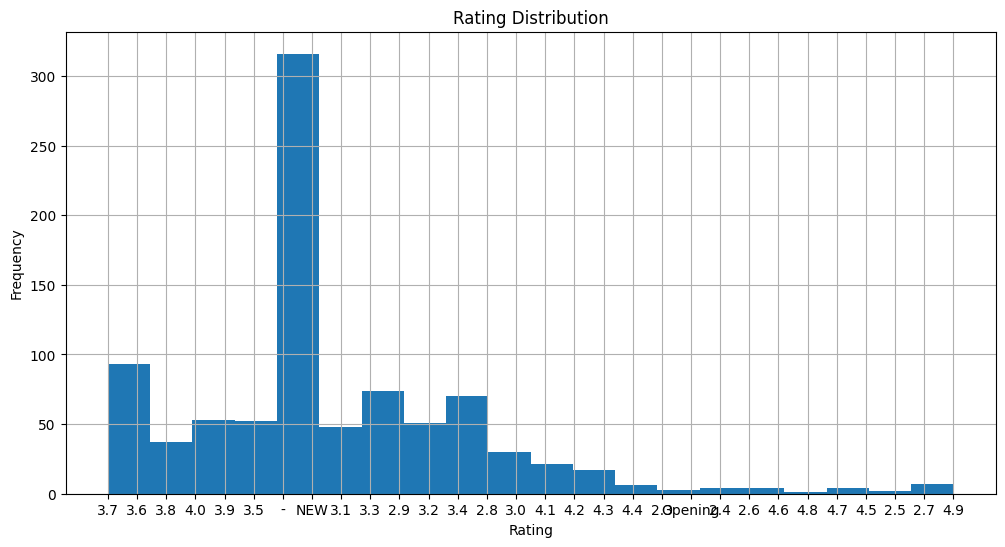

In [9]:
plt.figure(figsize=(12, 6))
city_data['RATING'].hist(bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


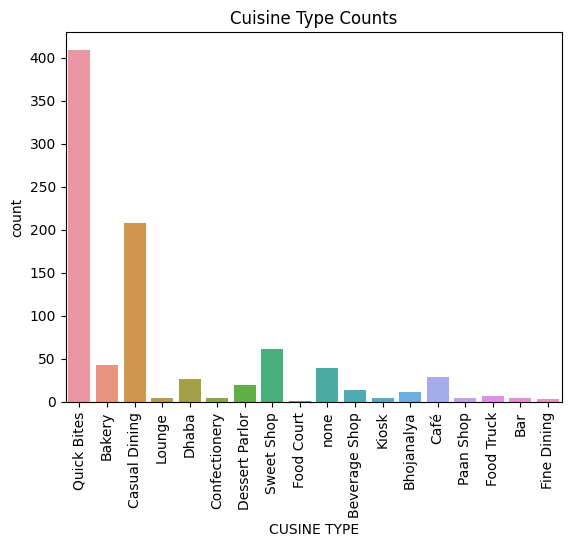

In [10]:
sns.countplot(x='CUSINE TYPE', data=city_data)
plt.xticks(rotation=90)
plt.title('Cuisine Type Counts')
plt.show()


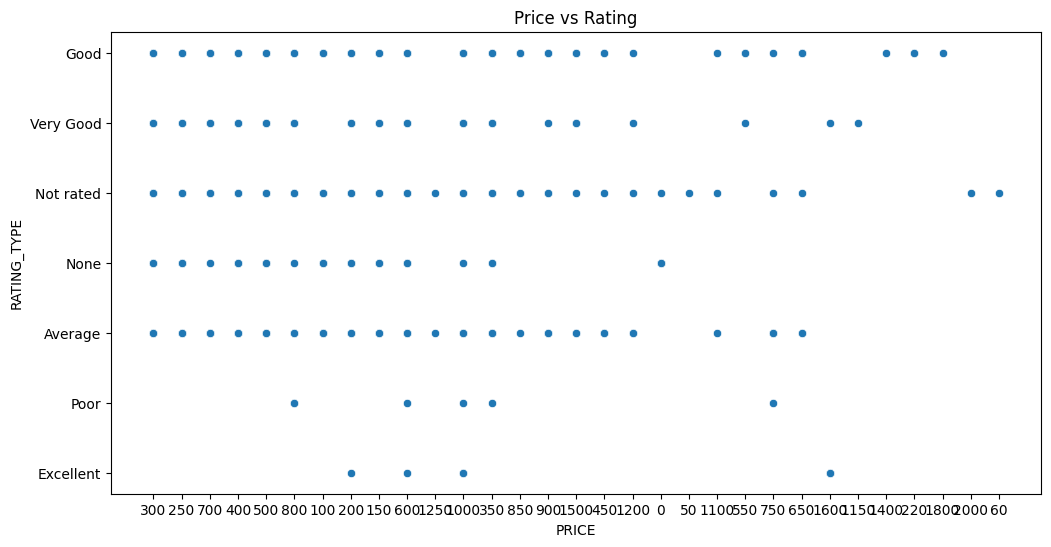

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PRICE', y='RATING_TYPE', data=city_data)
plt.title('Price vs Rating')
plt.show()



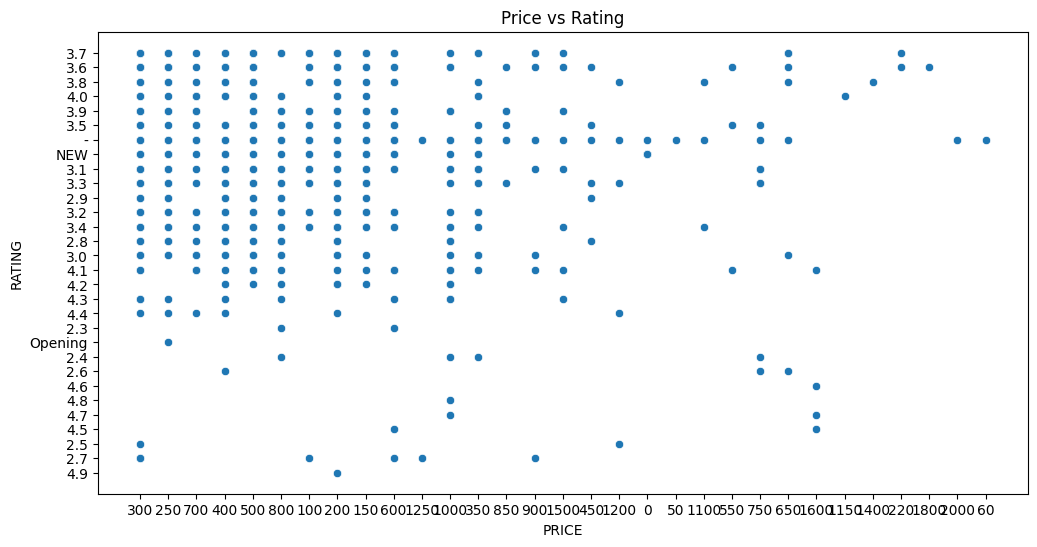

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PRICE', y='RATING', data=city_data)
plt.title('Price vs Rating')
plt.show()


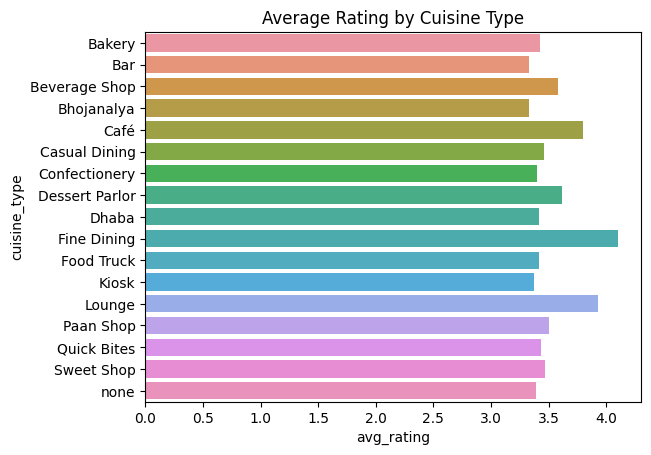

In [13]:
city_data['RATING'] = pd.to_numeric(city_data['RATING'], errors='coerce')

# Drop rows where 'rating' is NaN (if any)
city_data = city_data.dropna(subset=['RATING'])

avg_rating_by_cuisine = city_data.groupby('CUSINE TYPE')['RATING'].mean().reset_index()
avg_rating_by_cuisine = avg_rating_by_cuisine.rename(columns={'RATING': 'avg_rating', 'CUSINE TYPE': 'cuisine_type'})
sns.barplot(x='avg_rating', y='cuisine_type', data=avg_rating_by_cuisine)
plt.title('Average Rating by Cuisine Type')
plt.show()


In [14]:
from sklearn.decomposition import PCA
numeric_columns = city_data.select_dtypes(include=['float64', 'int64']).columns
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data['numeric_columns'])
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('PCA of Data')
plt.show()


TypeError: list indices must be integers or slices, not str

In [15]:
city_data['VOTES']


0       36
1       44
2      111
3      113
4       98
      ... 
884      5
886      8
887      4
888      4
891      4
Name: VOTES, Length: 576, dtype: object

In [16]:
city_data.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,city,cuisine
0,Love Restaurant,300,"North Indian,Fast Food,Beverages",Agra,Tajganj,https://www.zomato.com/agra/love-restaurant-ta...,9,Quick Bites,"8am to 11pm(Mon,Tue,Sat),8am to 1130pm...",Good,3.7,36,Agra,9-Agrahotels
1,WatchMeWhip,250,"Bakery,Desserts",Agra,Mantola,https://www.zomato.com/agra/watchmewhip-mantol...,9,Bakery,"9am to 9pm(Mon-Sat),Closed(Sun)",Good,3.6,44,Agra,9-Agrahotels
2,UP 80,700,"North Indian,Chinese",Agra,Dayal Bagh,https://www.zomato.com/agra/up-80-dayal-bagh/info,9,Casual Dining,11am to 1030pm(Mon-Sun),Good,3.7,111,Agra,9-Agrahotels
3,Potato Planet,400,Fast Food,Agra,Civil Lines,https://www.zomato.com/agra/potato-planet-1-ci...,9,Quick Bites,"12noon to 930pm(Mon-Sat),12noon to 10pm(Sun)",Good,3.8,113,Agra,9-Agrahotels
4,Anand He Anand Bhojanalaya,300,North Indian,Agra,Civil Lines,https://www.zomato.com/agra/anand-he-anand-bho...,9,Casual Dining,8am to 1am(Mon-Sun),Good,3.7,98,Agra,9-Agrahotels


In [38]:
#encoding and scaling
print("Encoded Data Columns: ")
print(data_encoded.columns.tolist())


scaler = StandardScaler()


numeric_columns = ['PRICE', 'RATING', 'VOTES'] 
region_columns = [col for col in data_encoded.columns if col.startswith('REGION_')]
cuisine_columns = [col for col in data_encoded.columns if col.startswith('CUSINE TYPE_')]


columns_to_scale = numeric_columns + region_columns + cuisine_columns


print("Columns to Scale: ", columns_to_scale)


scaled_data = scaler.fit_transform(data_encoded[columns_to_scale])





Encoded Data Columns: 
['NAME', 'PRICE', 'CUSINE_CATEGORY', 'CITY', 'URL', 'PAGE NO', 'TIMING', 'RATING_TYPE', 'RATING', 'VOTES', 'city', 'cuisine', 'REGION_Arjun Nagar', 'REGION_Civil Lines', 'REGION_Dayal Bagh', 'REGION_Hotel Amar-- Tajganj', 'REGION_Hotel Dasaprakash-- Tajganj', 'REGION_Hotel Ganga Ratan-- Tajganj', 'REGION_Hotel Pushp Villa-- Tajganj', 'REGION_Hotel Royale Residency-- Tajganj', 'REGION_Kamla Nagar', 'REGION_Khandari', 'REGION_Kuberpur', 'REGION_Lohamandi', 'REGION_Mansingh Palace-- Tajganj', 'REGION_Mantola', 'REGION_Rakabganj', 'REGION_Shahganj', 'REGION_Sikandra', 'REGION_Tajganj', 'CUSINE TYPE_Bar', 'CUSINE TYPE_Beverage Shop', 'CUSINE TYPE_Bhojanalya', 'CUSINE TYPE_Café', 'CUSINE TYPE_Casual Dining', 'CUSINE TYPE_Confectionery', 'CUSINE TYPE_Dessert Parlor', 'CUSINE TYPE_Dhaba', 'CUSINE TYPE_Fine Dining', 'CUSINE TYPE_Food Truck', 'CUSINE TYPE_Kiosk', 'CUSINE TYPE_Lounge', 'CUSINE TYPE_Paan Shop', 'CUSINE TYPE_Quick Bites', 'CUSINE TYPE_Sweet Shop', 'CUSINE TYP

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

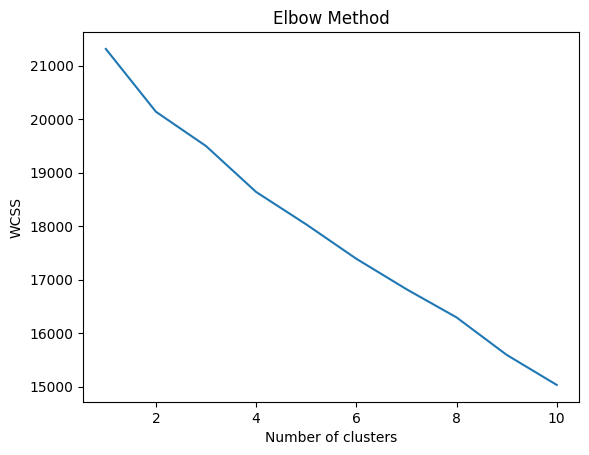

In [39]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [40]:
optimal_number = 4 
kmeans = KMeans(n_clusters=optimal_number,n_init=10)  
city_data['cluster'] = kmeans.fit_predict(scaled_data)

In [41]:
city_data.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,city,cuisine,cluster
0,Love Restaurant,300,"North Indian,Fast Food,Beverages",Agra,Tajganj,https://www.zomato.com/agra/love-restaurant-ta...,9,Quick Bites,"8am to 11pm(Mon,Tue,Sat),8am to 1130pm...",Good,3.7,36,Agra,9-Agrahotels,0
1,WatchMeWhip,250,"Bakery,Desserts",Agra,Mantola,https://www.zomato.com/agra/watchmewhip-mantol...,9,Bakery,"9am to 9pm(Mon-Sat),Closed(Sun)",Good,3.6,44,Agra,9-Agrahotels,0
2,UP 80,700,"North Indian,Chinese",Agra,Dayal Bagh,https://www.zomato.com/agra/up-80-dayal-bagh/info,9,Casual Dining,11am to 1030pm(Mon-Sun),Good,3.7,111,Agra,9-Agrahotels,1
3,Potato Planet,400,Fast Food,Agra,Civil Lines,https://www.zomato.com/agra/potato-planet-1-ci...,9,Quick Bites,"12noon to 930pm(Mon-Sat),12noon to 10pm(Sun)",Good,3.8,113,Agra,9-Agrahotels,0
4,Anand He Anand Bhojanalaya,300,North Indian,Agra,Civil Lines,https://www.zomato.com/agra/anand-he-anand-bho...,9,Casual Dining,8am to 1am(Mon-Sun),Good,3.7,98,Agra,9-Agrahotels,1


NameError: name 'centers_2d' is not defined

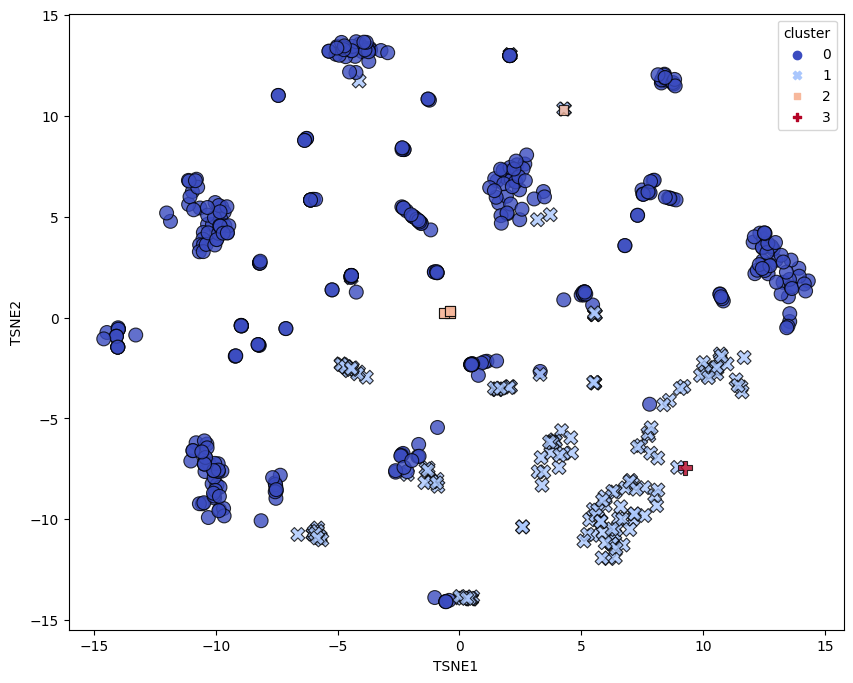

In [42]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce the data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_data = tsne.fit_transform(scaled_data)

# Add t-SNE components to the DataFrame
city_data['TSNE1'] = tsne_data[:, 0]
city_data['TSNE2'] = tsne_data[:, 1]

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', data=city_data, palette='coolwarm', s=100, alpha=0.8, edgecolor='k', style='cluster')
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=300, c='yellow', label='Centroids', marker='X')
plt.title('KMeans Clustering with t-SNE - Zomato Cuisine Data', fontsize=15)
plt.grid(True)
plt.show()


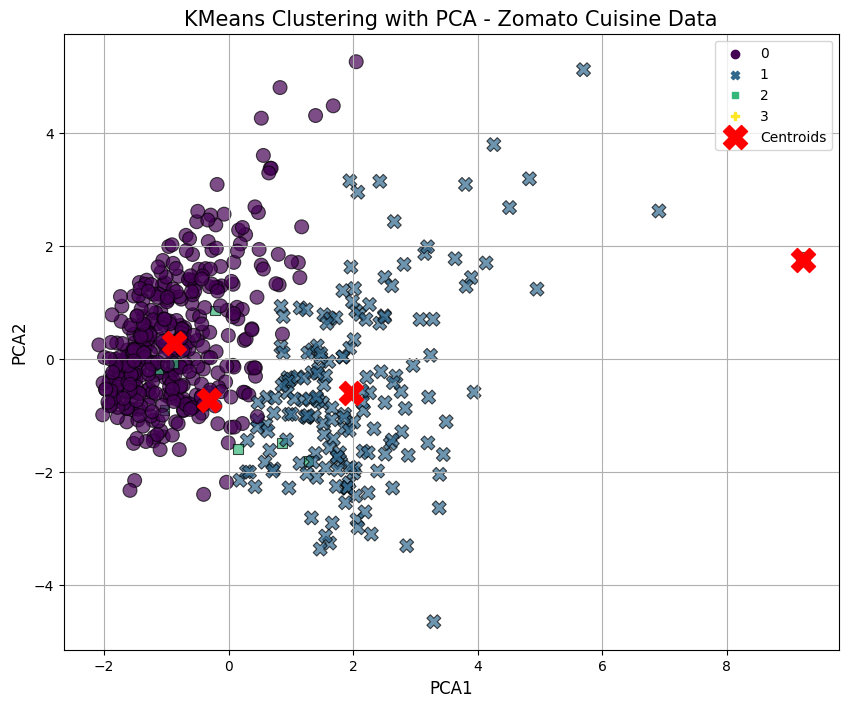

In [43]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


city_data['PCA1'] = pca_data[:, 0]
city_data['PCA2'] = pca_data[:, 1]


plt.figure(figsize=(10, 8))


sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=city_data, palette='viridis', s=100, alpha=0.7, edgecolor='k', style='cluster')


centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=300, c='red', label='Centroids', marker='X')


plt.title('KMeans Clustering with PCA - Zomato Cuisine Data', fontsize=15)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

Enter the city name:  Pune


Error reading /kaggle/input/zomato-india-data-set/Pune/15-Punehotels.csv: 12 columns passed, passed data had 13 columns
Error reading /kaggle/input/zomato-india-data-set/Pune/287-Punehotels.csv: 12 columns passed, passed data had 13 columns
Error reading /kaggle/input/zomato-india-data-set/Pune/6-Punehotels.csv: 12 columns passed, passed data had 13 columns
Error reading /kaggle/input/zomato-india-data-set/Pune/61-Punehotels.csv: 12 columns passed, passed data had 14 columns


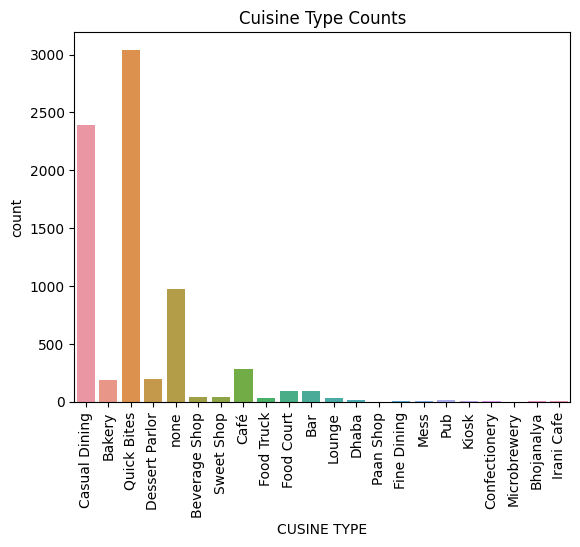

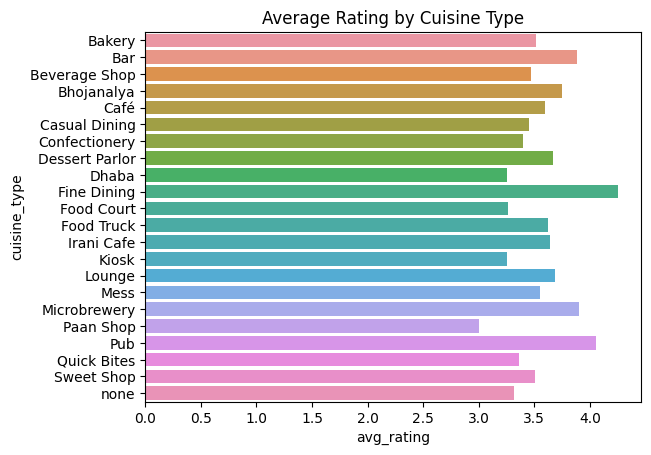

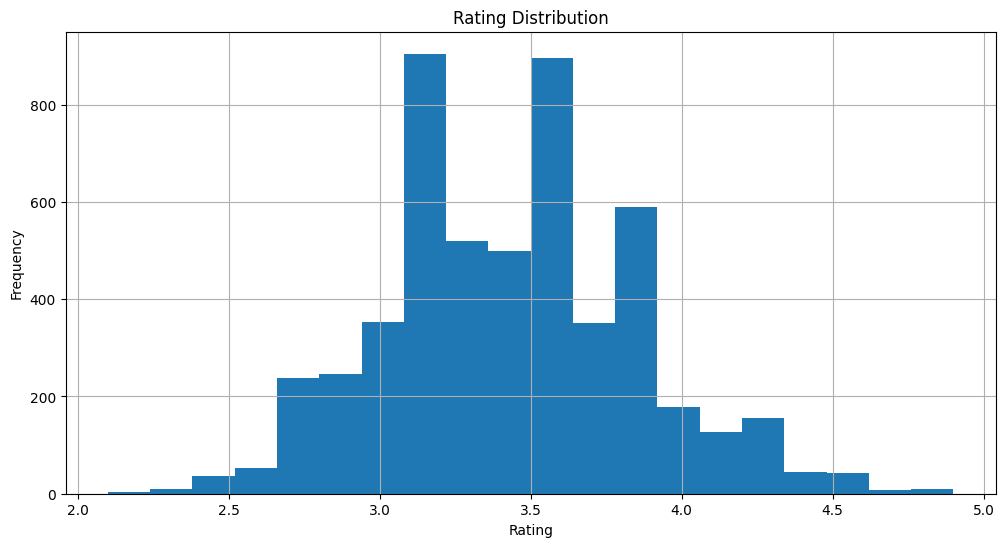

Data has been preprocessed and scaled.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

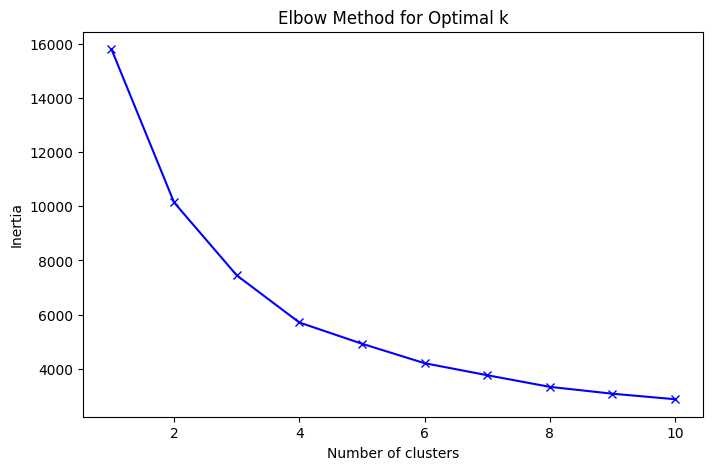

Enter the optimal number of clusters based on the elbow curve:  4


/tmp/ipykernel_36/2315739567.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.city_data['cluster']=kmeans.fit_predict(self.scaled_data)
/tmp/ipykernel_36/2315739567.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.city_data['PCA1'] = self.pca_data[:, 0]
/tmp/ipykernel_36/2315739567.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

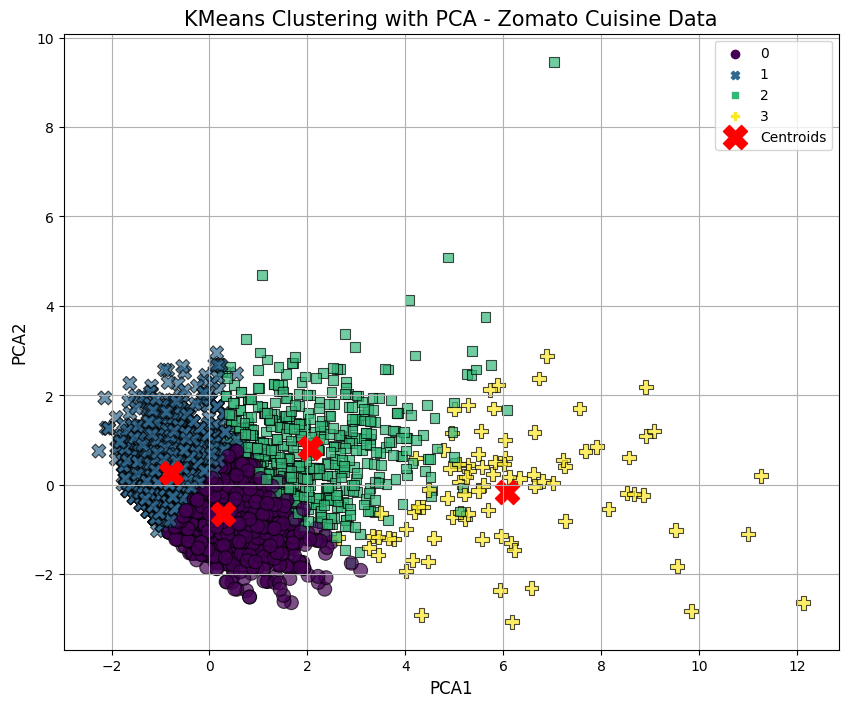

                             NAME PRICE              CUSINE_CATEGORY  CITY  \
0                    Savali Hotel   600   North Indian,Maharashtrian  Pune   
1  Brick Lane Bakery & Patisserie   400              Bakery,Desserts  Pune   
2                           Diced   400         Salad,Sandwich,Wraps  Pune   
3                     Hotel Kopra   300  Indian,Chinese,North Indian  Pune   
4        The Cake & Cream Factory   400              Desserts,Bakery  Pune   

          REGION                                                URL PAGE NO  \
0        Wagholi  https://www.zomato.com/pune/savali-hotel-3-wag...     291   
1      NIBM Road  https://www.zomato.com/pune/brick-lane-bakery-...     291   
2      Hinjawadi   https://www.zomato.com/pune/diced-hinjawadi/info     291   
3  Wadgaon Sheri  https://www.zomato.com/pune/hotel-kopra-wadgao...     291   
4   Pimple Gurav  https://www.zomato.com/pune/the-cake-cream-fac...     291   

      CUSINE TYPE                                       

In [79]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

class KMEANSClustering():
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.city_data = None
        self.scaled_data = None
        self.clusters = None
        self.pca_data = None
        self.kmeans = None
        
    def get_city_data(self, cityname):
        dataframes = []
        normalized_city_name = cityname.lower()

        
        for city_folder in os.listdir(self.dataset_path):
            city_path = os.path.join(self.dataset_path, city_folder)

            
            if os.path.isdir(city_path) and normalized_city_name in city_folder.lower():
                for file in os.listdir(city_path):
                    if file.endswith('.csv'):
                        file_path = os.path.join(city_path, file)
                        try:
                           
                            with open(file_path, 'r', encoding='utf-8') as f:
                                lines = f.readlines()

                            cleaned_data = []
                            for line in lines:
                                split_line = line.strip().split('|')
                                split_line = [item.replace('"', '').strip() for item in split_line]
                                cleaned_data.append(split_line)

                            
                            columns = cleaned_data[0]
                            data = cleaned_data[1:]

                            
                            df = pd.DataFrame(data, columns=columns)
                            df['city'] = cityname
                            df['cuisine'] = file[:-4]
                            dataframes.append(df)

                        except Exception as e:
                            print(f"Error reading {file_path}: {e}")

                
                if dataframes:
                    self.city_data = pd.concat(dataframes, ignore_index=True)
                    return self.city_data
                else:
                    print("No data found for the city.")
                    return None

        print("City not found")
        return None
    def EDA(self):
        sns.countplot(x='CUSINE TYPE', data=self.city_data)
        plt.xticks(rotation=90)
        plt.title('Cuisine Type Counts')
        plt.show()
        
        self.city_data['RATING'] = pd.to_numeric(self.city_data['RATING'], errors='coerce')


        self.city_data = self.city_data.dropna(subset=['RATING'])

        avg_rating_by_cuisine = self.city_data.groupby('CUSINE TYPE')['RATING'].mean().reset_index()
        avg_rating_by_cuisine = avg_rating_by_cuisine.rename(columns={'RATING': 'avg_rating', 'CUSINE TYPE': 'cuisine_type'})
        sns.barplot(x='avg_rating', y='cuisine_type', data=avg_rating_by_cuisine)
        plt.title('Average Rating by Cuisine Type')
        plt.show()
        
        plt.figure(figsize=(12, 6))
        self.city_data['RATING'].hist(bins=20)
        plt.title('Rating Distribution')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.show()
    
    def preprocess(self, numerical_cols):
        column_transformer=ColumnTransformer(transformers=[('onehot',OneHotEncoder(),categorical_cols)],remainder='passthrough')
        data_encoded= self.city_data[ numerical_cols].copy() #removed categorical data because it wasn't giving or helping in elbow method
        scaler = StandardScaler()
        self.scaled_data = scaler.fit_transform(data_encoded)
        print("Data has been preprocessed and scaled.")
        return self.scaled_data
        
    def elbow_method(self,k_range=range(1,11)):
        wcss=[]
        for k in k_range:
            kmeans=KMeans(n_clusters=k)
            kmeans.fit(self.scaled_data)
            wcss.append(kmeans.inertia_)
            
            
        plt.figure(figsize=(8,5))
        plt.plot(k_range, wcss, 'bx-')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.title('Elbow Method for Optimal k')
        plt.show()
        optimal_k = int(input("Enter the optimal number of clusters based on the elbow curve: "))
        return optimal_k
    def kmeans_model(self,optimal_k):
        self.kmeans=KMeans(n_clusters=optimal_k)
        self.city_data['cluster']=kmeans.fit_predict(self.scaled_data)
        
    def visualize(self):
        if self.scaled_data is None:
            raise ValueError("Data not preprocessed. Call preprocess() first.")
        if self.kmeans is None:
            raise ValueError("KMeans not performed. Call perform_kmeans() first.")
        pca = PCA(n_components=2)
        self.pca_data = pca.fit_transform(self.scaled_data)


        self.city_data['PCA1'] = self.pca_data[:, 0]
        self.city_data['PCA2'] = self.pca_data[:, 1]


        plt.figure(figsize=(10, 8))


        sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=self.city_data, palette='viridis', s=100, alpha=0.7, edgecolor='k', style='cluster')


        centers_2d = pca.transform(kmeans.cluster_centers_)
        plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=300, c='red', label='Centroids', marker='X')


        plt.title('KMeans Clustering with PCA - Zomato Cuisine Data', fontsize=15)
        plt.xlabel('PCA1', fontsize=12)
        plt.ylabel('PCA2', fontsize=12)
        plt.legend(loc='best')
        plt.grid(True)


        plt.show()
        

zomatoclustring = KMEANSClustering(dataset_path)

city_name = input("Enter the city name: ")
city_data = zomatoclustring.get_city_data(city_name)
EDA=zomatoclustring.EDA()
categorical_cols = ['REGION', 'CUSINE_CATEGORY']
numerical_cols = ['PRICE', 'RATING', 'VOTES']
preprocess = zomatoclustring.preprocess( numerical_cols)
cluster_number=zomatoclustring.elbow_method()
kmeans_=zomatoclustring.kmeans_model(cluster_number)
visualization=zomatoclustring.visualize()
if city_data is not None:
    print(city_data.head())


    
        

Enter the city name:  Pune


Error reading /kaggle/input/zomato-india-data-set/Pune/15-Punehotels.csv: 12 columns passed, passed data had 13 columns
Error reading /kaggle/input/zomato-india-data-set/Pune/287-Punehotels.csv: 12 columns passed, passed data had 13 columns
Error reading /kaggle/input/zomato-india-data-set/Pune/6-Punehotels.csv: 12 columns passed, passed data had 13 columns
Error reading /kaggle/input/zomato-india-data-set/Pune/61-Punehotels.csv: 12 columns passed, passed data had 14 columns
Data has been preprocessed and scaled.


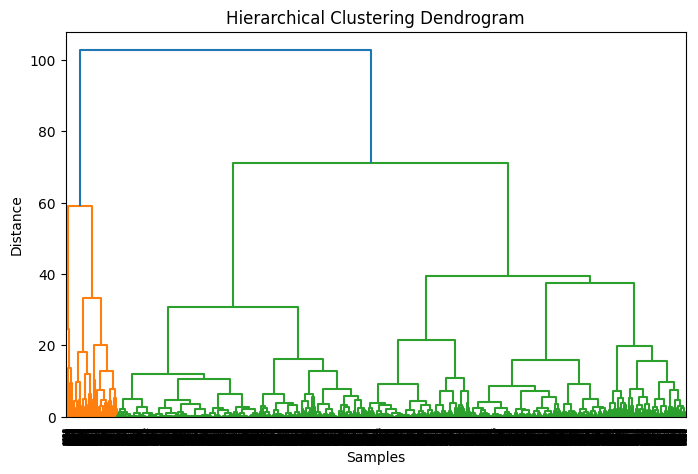

Enter the optimal number of clusters based on the dendrogram:  5


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/tmp/ipykernel_36/4104758174.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.city_data['cluster'] = clustering.fit_predict(self.scaled_data)
/tmp/ipykernel_36/4104758174.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.city_data['PCA1'] = self.pca_data[:, 0]
/tmp/ipykernel_36/41047

Clusters assigned to data


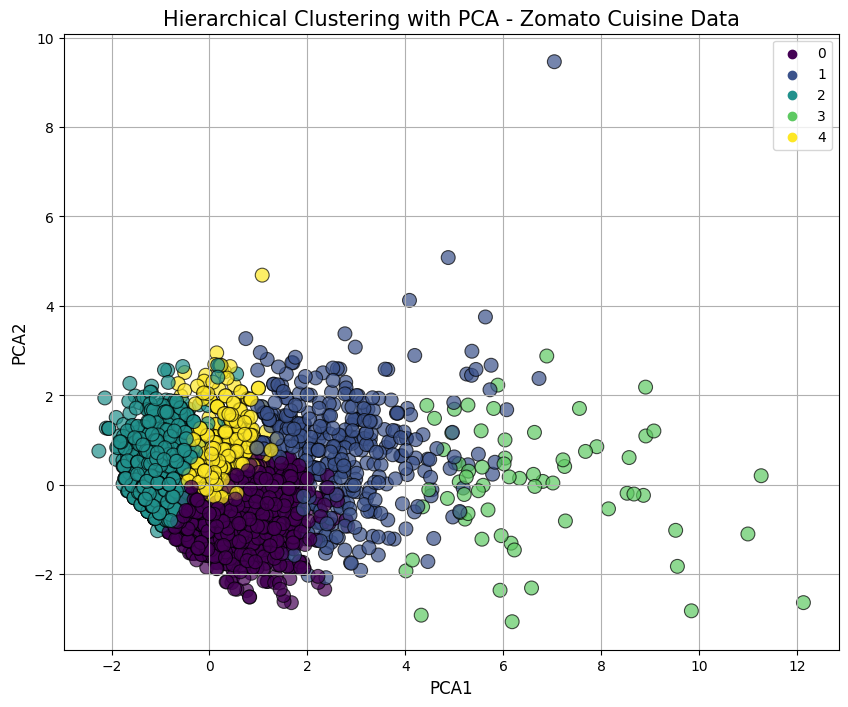

                             NAME  PRICE              CUSINE_CATEGORY  CITY  \
0                    Savali Hotel    600   North Indian,Maharashtrian  Pune   
1  Brick Lane Bakery & Patisserie    400              Bakery,Desserts  Pune   
2                           Diced    400         Salad,Sandwich,Wraps  Pune   
3                     Hotel Kopra    300  Indian,Chinese,North Indian  Pune   
4        The Cake & Cream Factory    400              Desserts,Bakery  Pune   

          REGION                                                URL PAGE NO  \
0        Wagholi  https://www.zomato.com/pune/savali-hotel-3-wag...     291   
1      NIBM Road  https://www.zomato.com/pune/brick-lane-bakery-...     291   
2      Hinjawadi   https://www.zomato.com/pune/diced-hinjawadi/info     291   
3  Wadgaon Sheri  https://www.zomato.com/pune/hotel-kopra-wadgao...     291   
4   Pimple Gurav  https://www.zomato.com/pune/the-cake-cream-fac...     291   

      CUSINE TYPE                                 

In [87]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
class HireClustering():
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.city_data = None
        self.scaled_data = None
        self.clusters = None
        self.pca_data = None
        self.linkage_matrix = None

    def get_city_data(self, cityname):
        dataframes = []
        normalized_city_name = cityname.lower()
        
        for city_folder in os.listdir(self.dataset_path):
            city_path = os.path.join(self.dataset_path, city_folder)
            if os.path.isdir(city_path) and normalized_city_name in city_folder.lower():
                for file in os.listdir(city_path):
                    if file.endswith('.csv'):
                        file_path = os.path.join(city_path, file)
                        try:
                            with open(file_path, 'r', encoding='utf-8') as f:
                                lines = f.readlines()

                            cleaned_data = []
                            for line in lines:
                                split_line = line.strip().split('|')
                                split_line = [item.replace('"', '').strip() for item in split_line]
                                cleaned_data.append(split_line)

                            columns = cleaned_data[0]
                            data = cleaned_data[1:]

                            df = pd.DataFrame(data, columns=columns)
                            df['city'] = cityname
                            df['cuisine'] = file[:-4]
                            dataframes.append(df)

                        except Exception as e:
                            print(f"Error reading {file_path}: {e}")

                if dataframes:
                    self.city_data = pd.concat(dataframes, ignore_index=True)
                    return self.city_data
                else:
                    print("No data found for the city.")
                    return None

        print("City not found")
        return None

    def preprocess(self, numerical_cols):
        self.city_data[numerical_cols] = self.city_data[numerical_cols].replace('-', np.nan)

   
        self.city_data[numerical_cols] = self.city_data[numerical_cols].apply(pd.to_numeric, errors='coerce')

    
        self.city_data = self.city_data.dropna(subset=numerical_cols)
        scaler = StandardScaler()
        self.scaled_data = scaler.fit_transform(self.city_data[numerical_cols])
        print("Data has been preprocessed and scaled.")
        return self.scaled_data

    def dendo_gram(self, method='ward'):
        self.linkage_matrix = linkage(self.scaled_data, method=method)
        plt.figure(figsize=(8, 5))
        dendrogram(self.linkage_matrix)
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Samples')
        plt.ylabel('Distance')
        plt.show()
        optimal_k = int(input("Enter the optimal number of clusters based on the dendrogram: "))
        return optimal_k

    def hierarchical_model(self, optimal_k, affinity='euclidean', linkage_method='ward'):
        clustering = AgglomerativeClustering(n_clusters=optimal_k, affinity=affinity, linkage=linkage_method)
        self.city_data['cluster'] = clustering.fit_predict(self.scaled_data)
        print("Clusters assigned to data")
        return self.city_data['cluster']

    def visualize(self):
        if self.scaled_data is None:
            raise ValueError("Data not preprocessed. Call preprocess() first.")
        pca = PCA(n_components=2)
        self.pca_data = pca.fit_transform(self.scaled_data)

        self.city_data['PCA1'] = self.pca_data[:, 0]
        self.city_data['PCA2'] = self.pca_data[:, 1]

        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=self.city_data, palette='viridis', s=100, alpha=0.7, edgecolor='k')

        plt.title('Hierarchical Clustering with PCA - Zomato Cuisine Data', fontsize=15)
        plt.xlabel('PCA1', fontsize=12)
        plt.ylabel('PCA2', fontsize=12)
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

zomatoclustring = HireClustering(dataset_path)

city_name = input("Enter the city name: ")
city_data = zomatoclustring.get_city_data(city_name)

categorical_cols = ['REGION', 'CUSINE_CATEGORY']
numerical_cols = ['PRICE', 'RATING', 'VOTES']
preprocess = zomatoclustring.preprocess(numerical_cols)
dendogram = zomatoclustring.dendo_gram()
hire_ = zomatoclustring.hierarchical_model(dendogram)
visualization = zomatoclustring.visualize()
if city_data is not None:
    print(city_data.head())


Enter the city name:  Kolhapur


Data has been preprocessed and scaled.


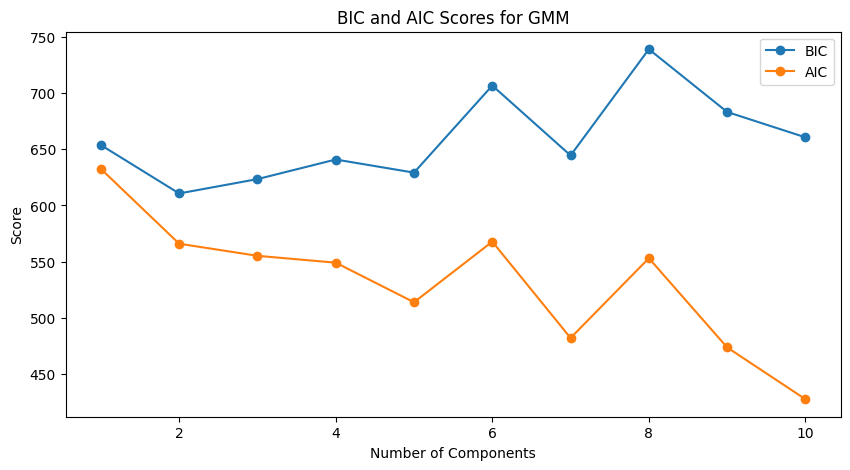

/tmp/ipykernel_36/3090061725.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.city_data['cluster'] = gmm.fit_predict(self.scaled_data)
/tmp/ipykernel_36/3090061725.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.city_data['PCA1'] = self.pca_data[:, 0]
/tmp/ipykernel_36/3090061725.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Clusters assigned to data


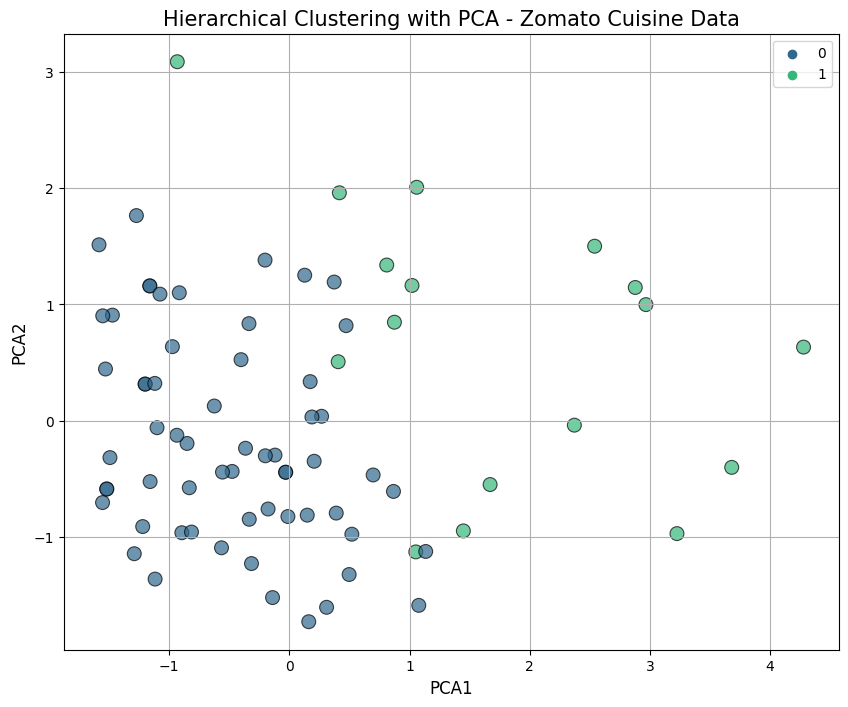

                            NAME  PRICE  \
0  Mhavra-the malvani fish house    600   
1             Rajabal Pan Mandir     50   
2        Hotel Ramkrishna corner    300   
3                  Cake and Bake    100   
4                    Khana Peena    350   

                            CUSINE_CATEGORY      CITY          REGION  \
0                                    Indian  Kolhapur   Tarabhai Park   
1                                      Paan  Kolhapur     Rajarampuri   
2                Indian,Kebab,Maharashtrian  Kolhapur       Shahupuri   
3  Sandwich,Pizza,Burger,Beverages,Desserts  Kolhapur  Mangalwar Peth   
4                                 Fast Food  Kolhapur  Mangalwar Peth   

                                                 URL PAGE NO    CUSINE TYPE  \
0  https://www.zomato.com/kolhapur/mhavra-the-mal...      14  Casual Dining   
1  https://www.zomato.com/kolhapur/rajabal-pan-ma...      14      Paan Shop   
2  https://www.zomato.com/kolhapur/hotel-ramkrish...      14    F

In [90]:
from sklearn.mixture import GaussianMixture
class GMM():
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.city_data = None
        self.scaled_data = None
        self.clusters = None
        self.pca_data = None
        
        self.bic_scores = []
        self.aic_scores = []
        self.n_components_range = range(1, 11)

    def get_city_data(self, cityname):
        dataframes = []
        normalized_city_name = cityname.lower()
        
        for city_folder in os.listdir(self.dataset_path):
            city_path = os.path.join(self.dataset_path, city_folder)
            if os.path.isdir(city_path) and normalized_city_name in city_folder.lower():
                for file in os.listdir(city_path):
                    if file.endswith('.csv'):
                        file_path = os.path.join(city_path, file)
                        try:
                            with open(file_path, 'r', encoding='utf-8') as f:
                                lines = f.readlines()

                            cleaned_data = []
                            for line in lines:
                                split_line = line.strip().split('|')
                                split_line = [item.replace('"', '').strip() for item in split_line]
                                cleaned_data.append(split_line)

                            columns = cleaned_data[0]
                            data = cleaned_data[1:]

                            df = pd.DataFrame(data, columns=columns)
                            df['city'] = cityname
                            df['cuisine'] = file[:-4]
                            dataframes.append(df)

                        except Exception as e:
                            print(f"Error reading {file_path}: {e}")

                if dataframes:
                    self.city_data = pd.concat(dataframes, ignore_index=True)
                    return self.city_data
                else:
                    print("No data found for the city.")
                    return None

        print("City not found")
        return None

    def preprocess(self, numerical_cols):
        self.city_data[numerical_cols] = self.city_data[numerical_cols].replace('-', np.nan)

   
        self.city_data[numerical_cols] = self.city_data[numerical_cols].apply(pd.to_numeric, errors='coerce')

    
        self.city_data = self.city_data.dropna(subset=numerical_cols)
        scaler = StandardScaler()
        self.scaled_data = scaler.fit_transform(self.city_data[numerical_cols])
        print("Data has been preprocessed and scaled.")
        return self.scaled_data

    def gmm_ncompo(self):
        for n_components in self.n_components_range:
            gmm = GaussianMixture(n_components=n_components)
            gmm.fit(self.scaled_data)
            self.bic_scores.append(gmm.bic(self.scaled_data))
            self.aic_scores.append(gmm.aic(self.scaled_data))
        
        plt.figure(figsize=(10, 5))
        plt.plot(self.n_components_range, self.bic_scores, label='BIC', marker='o')
        plt.plot(self.n_components_range, self.aic_scores, label='AIC', marker='o')
        plt.xlabel('Number of Components')
        plt.ylabel('Score')
        plt.title('BIC and AIC Scores for GMM')
        plt.legend()
        plt.show()
        optimal_bic_components = self.n_components_range[np.argmin(self.bic_scores)]
        optimal_aic_components = self.n_components_range[np.argmin(self.aic_scores)]
        
        return optimal_bic_components

    def GMM_model(self, optimal_k):
        gmm = GaussianMixture(n_components=optimal_k)
        self.city_data['cluster'] = gmm.fit_predict(self.scaled_data)
        print("Clusters assigned to data")
        return self.city_data['cluster']

    def visualize(self):
        if self.scaled_data is None:
            raise ValueError("Data not preprocessed. Call preprocess() first.")
        pca = PCA(n_components=2)
        self.pca_data = pca.fit_transform(self.scaled_data)

        self.city_data['PCA1'] = self.pca_data[:, 0]
        self.city_data['PCA2'] = self.pca_data[:, 1]

        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=self.city_data, palette='viridis', s=100, alpha=0.7, edgecolor='k')

        plt.title('Hierarchical Clustering with PCA - Zomato Cuisine Data', fontsize=15)
        plt.xlabel('PCA1', fontsize=12)
        plt.ylabel('PCA2', fontsize=12)
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

zomatoclustring = GMM(dataset_path)

city_name = input("Enter the city name: ")
city_data = zomatoclustring.get_city_data(city_name)

categorical_cols = ['REGION', 'CUSINE_CATEGORY']
numerical_cols = ['PRICE', 'RATING', 'VOTES']
preprocess = zomatoclustring.preprocess(numerical_cols)
n_components = zomatoclustring.gmm_ncompo()
hire_ = zomatoclustring.GMM_model(n_components)
visualization = zomatoclustring.visualize()
if city_data is not None:
    print(city_data.head())